In [3]:
mkdir /home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/': File exists


In [1]:
import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from modish.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla
study = flotilla.embark('singlecell_pnm_figure3_differential_expression')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (11,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


2015-10-26 07:33:31	Reading datapackage from /home/obotvinnik/flotilla_projects/singlecell_pnm_figure3_differential_expression/datapackage.json
2015-10-26 07:33:31	Parsing datapackage to create a Study object
2015-10-26 07:34:17	Initializing Study
2015-10-26 07:34:17	Initializing Predictor configuration manager for Study
2015-10-26 07:34:17	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-10-26 07:34:17	Added ExtraTreesClassifier to default predictors
2015-10-26 07:34:17	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-10-26 07:34:17	Added ExtraTreesRegressor to default predictors
2015-10-26 07:34:17	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-10-26 07:34:17	Added GradientBoostingClassifier to default predictors
2015-10-26 07:34:17	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.g

In [2]:
not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

psi = study.splicing.singles.ix[not_outliers]
grouped = psi.groupby(study.sample_id_to_phenotype)
psi_filtered = grouped.apply(lambda x: x.dropna(axis=1, thresh=20))

## Calculate *voyage* space via `bon voyage`

In [3]:
from bonvoyage import VoyageSpace

In [4]:
vs = VoyageSpace()

waypoints = psi_filtered.groupby(study.sample_id_to_phenotype).apply(lambda x: vs.transform(x.dropna(how='all', axis=1)))

In [5]:
transitions = study.phenotype_transitions + [('iPSC', 'MN')]
transitions

[(u'iPSC', u'NPC'), (u'NPC', u'MN'), ('iPSC', 'MN')]

In [6]:
from bonvoyage.bonvoyage import distances

In [7]:
voyages = distances(waypoints, transitions)
voyages.head()

,event_id,$\Delta x$,$\Delta y$,voyage_distance,group1,group2,direction,transition
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.053571,-0.054198,0.076206,iPSC,NPC,$\searrow$,iPSC-NPC
1,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,NPC,$\swarrow$,iPSC-NPC
2,exon:chr10:102747070-102747190:-@exon:chr10:10...,0.004480,-0.004480,0.006336,iPSC,NPC,$\searrow$,iPSC-NPC
3,exon:chr10:103348089-103348157:+@exon:chr10:10...,0.000000,-0.027778,0.027778,iPSC,NPC,$\swarrow$,iPSC-NPC
4,exon:chr10:103360960-103361093:+@exon:chr10:10...,-0.056306,0.055556,0.079100,iPSC,NPC,$\nwarrow$,iPSC-NPC


In [8]:
voyages['transition'] = voyages.group1 + '-' + voyages.group2
voyages.head()

,event_id,$\Delta x$,$\Delta y$,voyage_distance,group1,group2,direction,transition
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.053571,-0.054198,0.076206,iPSC,NPC,$\searrow$,iPSC-NPC
1,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,NPC,$\swarrow$,iPSC-NPC
2,exon:chr10:102747070-102747190:-@exon:chr10:10...,0.004480,-0.004480,0.006336,iPSC,NPC,$\searrow$,iPSC-NPC
3,exon:chr10:103348089-103348157:+@exon:chr10:10...,0.000000,-0.027778,0.027778,iPSC,NPC,$\swarrow$,iPSC-NPC
4,exon:chr10:103360960-103361093:+@exon:chr10:10...,-0.056306,0.055556,0.079100,iPSC,NPC,$\nwarrow$,iPSC-NPC


## Add the data to the study and save it

In [9]:
study.supplemental.waypoints = waypoints
study.supplemental.voyages = voyages

In [10]:
study.save('singlecell_pnm_figure4_voyages')

Wrote datapackage to /home/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json


In [ ]:
mpl.ticker.MaxNLocator(4)

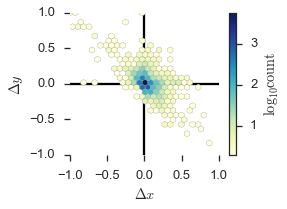

In [113]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(4, 3))
x = study.supplemental.voyages['$\Delta x$']
y = study.supplemental.voyages['$\Delta y$']

# ind = (x != 0) & (y != 0)
# x = x[ind]
# y = y[ind]

xmin = x.min()
xmax = x.max()

ymin = y.min()
ymax = y.max()

vmin = min(xmin, ymin)
vmax = max(xmax, ymax)

image = ax.hexbin(x, y, mincnt=1, bins='log', 
                  gridsize=25,
                  cmap='YlGnBu', edgecolor='darkgrey')
ax.hlines(0, vmin, vmax, zorder=-1)
ax.vlines(0, vmin, vmax, zorder=-1)
ax.set(xlabel='$\Delta x$', ylabel='$\Delta y$')
sns.despine(left=True, bottom=True)
plt.colorbar(image, label='$\log_{10} \mathrm{count}$', ticks=mpl.ticker.MaxNLocator(4))
fig.tight_layout()
fig.savefig('{}/voyage_distances_deltas.pdf'.format(folder))

In [119]:
transition_strs = ['{}-{}'.format(*transition) for transition in transitions]
transition_strs

['iPSC-NPC', 'NPC-MN', 'iPSC-MN']

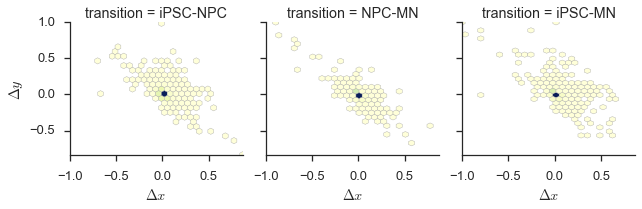

In [121]:
g = sns.FacetGrid(voyage_distances, col='transition', col_order=transition_strs)
g.map(plt.hexbin, '$\Delta x$', '$\Delta y$', mincnt=1, #bins='log', 
      gridsize=25,
      cmap='YlGnBu', edgecolor='darkgrey')

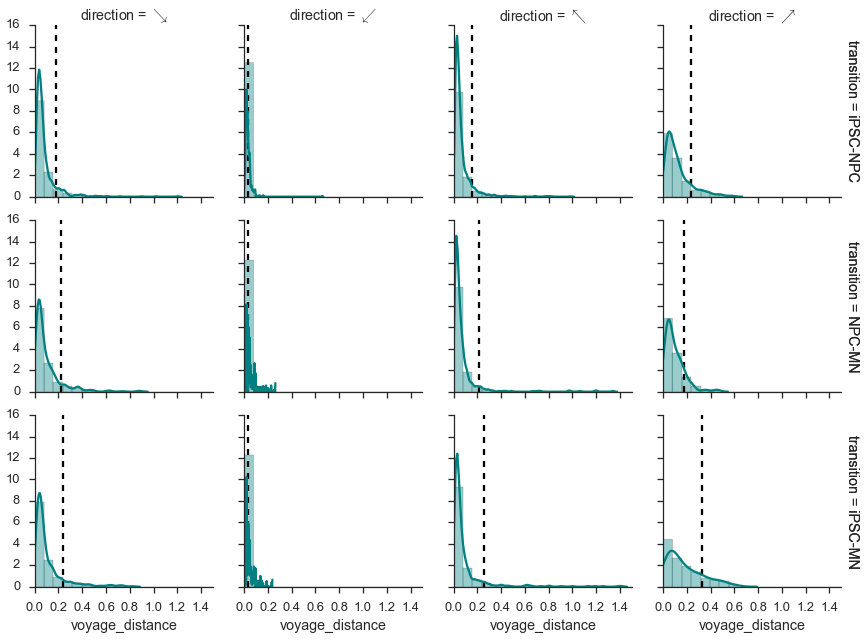

In [122]:
def mean_cutoff(x, *args, **kwargs):
    ax = kwargs['ax'] if 'ax' in kwargs else plt.gca()
    ymin, ymax = ax.get_ylim()
    cutoff = x.mean() + x.std()
    ax.vlines(cutoff, ymin, ymax, **kwargs)

g = sns.FacetGrid(voyage_distances, col='direction', row='transition', margin_titles=True, row_order=transition_strs)
g.map(sns.distplot, 'voyage_distance', color='teal', kde=True, bins=np.linspace(0, 1.5, 20))
g.map(mean_cutoff, 'voyage_distance', linestyle='--', color='k')
g.set(xlim=(0, 1.5))
g.savefig('{}/voyages_histogram_facetgrid.pdf'.format(folder))

transition
NPC-MN      341
iPSC-MN     356
iPSC-NPC    745
dtype: int64
248.0
105.0
68.0


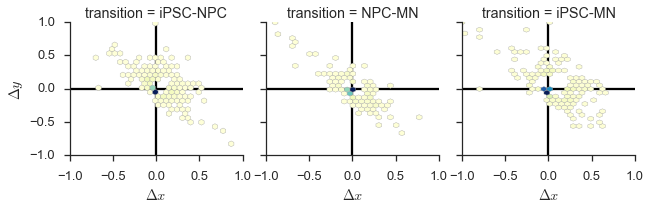

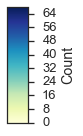

In [123]:
delta_cols = ['$\Delta x$', '$\Delta y$']

filtered = voyage_distances.groupby(['transition', 'direction']).apply(
    lambda x: x.loc[(x[delta_cols].abs() > (x[delta_cols].abs().mean() + 1*x[delta_cols].abs().std())).any(axis=1)])
print filtered.groupby('transition').size()

vmax = 35

g = sns.FacetGrid(filtered, col='transition', col_order=transition_strs)
g.map(plt.hexbin, '$\Delta x$', '$\Delta y$',# bins='log', 
      cmap='YlGnBu',
      mincnt=1, edgecolor='darkgrey', gridsize=25, #vmax=vmax, 
      vmin=0)
for ax in g.axes.flat:
    ax.hlines(0, -1, 1, color='k', zorder=-1)
    ax.vlines(0, -1, 1, color='k', zorder=-1)
    print np.max(ax.collections[0].get_array())
    
g.set(xlim=(-1, 1), ylim=(-1, 1))
g.savefig('{}/per_transition_voyages_facetgrid.pdf'.format(folder))

cfig, cax = plt.subplots(figsize=(1.25, 2))
plt.colorbar(ax.collections[0], cax=cax, orientation='vertical',  label='Count')
cfig.tight_layout()
cfig.savefig('{}/per_transition_voyages_facetgrid_colorbar.pdf'.format(folder))
# sns.despine(bottom=True, left=True)

In [19]:
splicing_feature_data = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/splicing_feature_data.csv')
print splicing_feature_data.shape
splicing_feature_data.head()

(33693, 68)


,event_id,criteria,criteria_additional,criteria_full,ensembl_id,exon1,exon1_length,exon2,exon2_length,exon3,...,exon2_phastcons_placental_mammal,isoform_domain_effects,isoform1_pfam_accession,isoform2_pfam_accession,isoform1_pfam_name,isoform2_pfam_name,isoform1_pfam_go_name,isoform2_pfam_go_name,isoform1_pfam_go_id,isoform2_pfam_go_id
0,exon:chr10:100190328-100190427:-@exon:chr10:10...,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100189330-100189399:-,...,0.291112,No annotated reading frame --> Protein +/- domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,exon:chr10:100193697-100193848:-@exon:chr10:10...,only one,NaN,only one,ENSG00000107521,exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,...,0.803519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,exon:chr10:100195392-100195529:-@exon:chr10:10...,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,...,0.839394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,exon:chr10:101165513-101165617:-@exon:chr10:10...,only one,NaN,only one,ENSG00000120053,exon:chr10:101165513-101165617:-,105,exon:chr10:101163481-101163631:-,151,exon:chr10:101163226-101163391:-,...,0.978780,No annotated reading frame --> Protein +/- domain,NaN,PF00155.16[1],NaN,Aminotran_1_2[1],NaN,"(pyridoxal phosphate binding)[1],(biosynthetic...",NaN,"GO:0030170[1],GO:0009058[1]"
4,exon:chr10:101419263-101419345:+@exon:chr10:10...,only one,NaN,only one,ENSG00000198018,exon:chr10:101419263-101419345:+,83,exon:chr10:101419619-101419721:+,103,exon:chr10:101421203-101421385:+,...,0.934804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
for (transition, direction), df in filtered.groupby(['transition', 'direction']):
    print transition, direction, df.shape

 NPC-MN $\nearrow$ (21, 8)
NPC-MN $\nwarrow$ (45, 8)
NPC-MN $\searrow$ (72, 8)
NPC-MN $\swarrow$ (206, 8)
iPSC-MN $\nearrow$ (42, 8)
iPSC-MN $\nwarrow$ (52, 8)
iPSC-MN $\searrow$ (79, 8)
iPSC-MN $\swarrow$ (183, 8)
iPSC-NPC $\nearrow$ (74, 8)
iPSC-NPC $\nwarrow$ (165, 8)
iPSC-NPC $\searrow$ (152, 8)
iPSC-NPC $\swarrow$ (353, 8)


In [ ]:
study.splicing.feature_data

In [ ]:
%time nmf_space_postions = study.nmf_space_positions()

In [ ]:
nmf_space_postions

In [ ]:
nmf_positions_tidy = nmf_space_postions.reset_index()
nmf_positions_tidy = nmf_positions_tidy.rename(columns={'level_0': 'event_name'})
nmf_positions_tidy.head()

#### Create specific phenotype transitions

In [ ]:
phenotype_transitions = study.phenotype_transitions + [('iPSC', 'MN')]
phenotype_transitions

In [ ]:
%time nmf_space_distances = study.nmf_space_transitions(phenotype_transitions=phenotype_transitions)

In [ ]:
nmf_distances_tidy = nmf_space_distances.unstack().reset_index()
nmf_distances_tidy = nmf_distances_tidy.rename(columns={'level_0': 'transition', 'level_1': 'event_name', 0:'distance'})
nmf_distances_tidy.head()

In [ ]:
nmf_distances_tidy['transition'] = nmf_distances_tidy.transition.map(lambda x: '-'.join(x))
nmf_distances_tidy.head()

In [ ]:
# modalities_tidy = pd.read_csv('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/modalities_tidy.csv')
# modalities_tidy.head()

In [ ]:
cols = ['event_name', 'phenotype']
nmf_positions_modalities = nmf_positions_tidy.merge(study.supplemental.modalities_tidy, left_on=cols, right_on=cols)
nmf_positions_modalities.head()

## Get direction of change

### Set x- and y-label of axes

In [ ]:
voyage_space_xlabel = '~0'
voyage_space_ylabel = '~1'

In [ ]:
from modish.visualize import MODALITY_ORDER
import matplotlib as mpl

order = MODALITY_ORDER[:-1]


# folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure5_nmf'

for phenotype, phenotype_df in nmf_positions_modalities.groupby('phenotype'):
    fig, ax = plt.subplots(figsize=(4, 4))
    
    xmax = 0
    ymax = 0
    
#     for modality, modality_df in phenotype_df.groupby('modality'):
    x = phenotype_df.pc_1
    y = phenotype_df.pc_2
    xmax = max(x.max(), xmax)
    ymax = max(y.max(), ymax)
    ax.plot(x, y, 'o', color='#262626', alpha=0.75)
    pdf = '{}/nmf_positions_{}.pdf'.format(folder, phenotype)
    print pdf
    ax.legend(ncol=2, columnspacing=.5)
    sns.despine()
    ax.set(xlabel=voyage_space_xlabel, ylabel=voyage_space_ylabel, 
           xticks=[], yticks=[], ylim=(0, 1.01*ymax), xlim=(0, 1.01*xmax), title=phenotype)
    fig.tight_layout()
    fig.savefig(pdf)

### Plot events with $\mathrm{mean}\left| \Psi_{\text{pooled}} - \Psi_{\text{singles}}\right| > \epsilon$

These are events which are inconsistent with the pooled samples, meaning the pooled samples alone would be insufficient to identify the change in distribution.

In [128]:
singles_grouped = study.splicing.singles.groupby(study.sample_id_to_phenotype)
pooled_grouped = study.splicing.pooled.groupby(study.sample_id_to_phenotype)

min_difference = 0.2

mean_diff_dfs = []

for phenotype, singles in singles_grouped:
    singles = singles.dropna(how='all',axis=1)
    pooled = pooled_grouped.get_group(phenotype).dropna(how='all', axis=1)
    
    singles, pooled = singles.align(pooled, axis=1, join='inner')
    mean_difference = pooled.apply(lambda x: singles.subtract(x, axis=1).abs().mean(axis=0), axis=1)
    
    mean_diff_df = mean_difference.unstack().reset_index()
    mean_diff_df['phenotype'] = phenotype
    mean_diff_dfs.append(mean_diff_df)
        
mean_diff_df = pd.concat(mean_diff_dfs)
mean_diff_df = mean_diff_df.rename(columns={0: 'mean diff', 'level_0': 'event_name', 
                                            'level_1':'pooled_id'})
mean_diff_df.head()

,event_name,pooled_id,mean diff,phenotype
0,exon:chr10:101165513-101165617:-@exon:chr10:10...,M2_05,0.127263,MN
1,exon:chr10:101165513-101165617:-@exon:chr10:10...,M2nd_13,0.002367,MN
2,exon:chr10:101165513-101165617:-@exon:chr10:10...,M2nd_21,0.002367,MN
3,exon:chr10:101480744-101480825:-@exon:chr10:10...,M2_05,0.050000,MN
4,exon:chr10:101480744-101480825:-@exon:chr10:10...,M2nd_13,0.050000,MN


In [129]:
mean_diff_df['inconsistent_pooled'] = mean_diff_df['mean diff'] >= min_difference

/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/nmf_positions_modalities_MN_pooled_inconsistent.pdf
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/nmf_positions_modalities_NPC_pooled_inconsistent.pdf
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/nmf_positions_modalities_iPSC_pooled_inconsistent.pdf


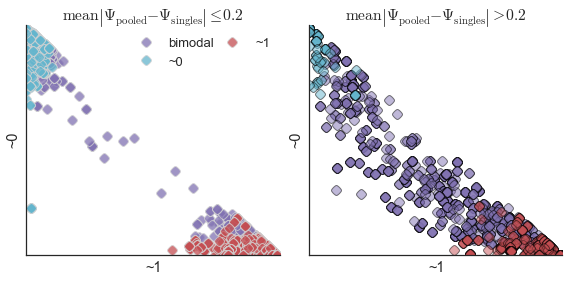

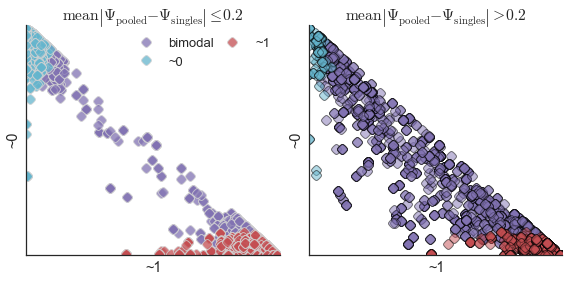

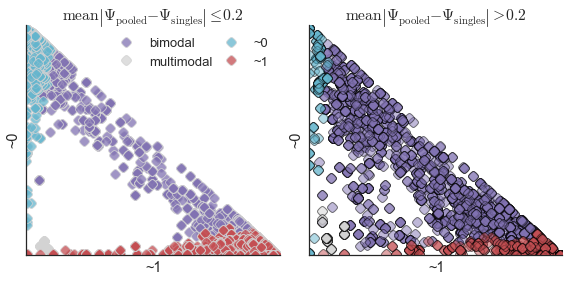

In [130]:



mean_diff_grouped = mean_diff_df.groupby('phenotype')

for phenotype, phenotype_df in nmf_positions_modalities.groupby('phenotype'):
    fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
    ax_consistent = axes[0]
    ax_inconsistent = axes[1]
    mean_diff = mean_diff_grouped.get_group(phenotype)
    
    xmax = 0
    ymax = 0
    
    for modality, modality_df in phenotype_df.groupby('modality'):
        modality_df = modality_df.set_index('event_name')
        x = modality_df.pc_1
        y = modality_df.pc_2
        xmax = max(x.max(), xmax)
        ymax = max(y.max(), ymax)
        color = MODALITY_TO_COLOR[modality]
        for inconsistent_pooled, df in mean_diff.groupby('inconsistent_pooled'):
            events = df.event_name.unique()
            x_subset = x[events]
            y_subset = y[events]
            if inconsistent_pooled:
                markeredgecolor = 'k'
                label = None
                ax_inconsistent.plot(x_subset, y_subset, 'o', color=color, alpha=0.5, label=label, 
                                     markeredgecolor=markeredgecolor, markeredgewidth=1, rasterized=True)
#                 ax.plot(x_subset, y_subset, 'o', color='#262626', alpha=0.5, label=None)
            else:
                markeredgecolor = 'lightgrey'
                label = modality
                ax_consistent.plot(x_subset, y_subset, 'o', color=color, alpha=0.75, label=label,
                                  markeredgecolor=markeredgecolor, markeredgewidth=1, rasterized=True)
            
#             print x_subset
            
    ax_consistent.set(title=r'$\mathrm{mean}\left| \Psi_{\mathrm{pooled}} - \Psi_{\mathrm{singles}}\right| \leq ' +
                      '{:.1f}$'.format(min_difference))
    ax_inconsistent.set(title=r'$\mathrm{mean}\left| \Psi_{\mathrm{pooled}} - \Psi_{\mathrm{singles}}\right| > ' +
                      '{:.1f}$'.format(min_difference))  
    for ax in axes:
        ax.legend(ncol=2, columnspacing=.5)
        sns.despine()
        ax.set(xlabel='~1', ylabel='~0', xticks=[], yticks=[], ylim=(0, 1.01*ymax), xlim=(0, 1.01*xmax))
    fig.tight_layout()

    pdf = '{}/nmf_positions_modalities_{}_pooled_inconsistent.pdf'.format(folder, phenotype)
    print pdf
    fig.savefig(pdf)

In [131]:
mean_diff_df.head()

,event_name,pooled_id,mean diff,phenotype,inconsistent_pooled
0,exon:chr10:101165513-101165617:-@exon:chr10:10...,M2_05,0.127263,MN,False
1,exon:chr10:101165513-101165617:-@exon:chr10:10...,M2nd_13,0.002367,MN,False
2,exon:chr10:101165513-101165617:-@exon:chr10:10...,M2nd_21,0.002367,MN,False
3,exon:chr10:101480744-101480825:-@exon:chr10:10...,M2_05,0.050000,MN,False
4,exon:chr10:101480744-101480825:-@exon:chr10:10...,M2nd_13,0.050000,MN,False


In [132]:
event_phenotype_inconsistent = mean_diff_df.groupby(['event_name', 'phenotype'])['inconsistent_pooled'].any()

In [133]:
nmf_positions_modalities_pooled_inconsistent = nmf_positions_modalities.set_index(['event_name', 'phenotype'])
nmf_positions_modalities_pooled_inconsistent['inconsistent_pooled'] = event_phenotype_inconsistent
nmf_positions_modalities_pooled_inconsistent.head()

pc_1  \
event_name                                         phenotype             
exon:chr10:101165513-101165617:-@exon:chr10:101... NPC        0.079180   
                                                   iPSC       0.076545   
exon:chr10:101480744-101480825:-@exon:chr10:101... NPC        0.067866   
                                                   iPSC       0.069894   
exon:chr10:101507014-101507147:+@exon:chr10:101... iPSC       0.047605   

                                                                  pc_2  \
event_name                                         phenotype             
exon:chr10:101165513-101165617:-@exon:chr10:101... NPC        0.000000   
                                                   iPSC       0.000035   
exon:chr10:101480744-101480825:-@exon:chr10:101... NPC        0.016395   
                                                   iPSC       0.000073   
exon:chr10:101507014-101507147:+@exon:chr10:101... iPSC       0.011661   

                                                             modality  \
event_name                                         phenotype            
exon:chr10:101165513-101165617:-@exon:chr10:101... NPC             ~1   
                                                   iPSC            ~1   
exon:chr10:101480744-101480825:-@exon:chr10:101... NPC        bimodal   
                                                   iPSC            ~1   
exon:chr10:101507014-101507147:+@exon:chr10:101... iPSC       bimodal   

                                                              n_cells  \
event_name                                         phenotype            
exon:chr10:101165513-101165617:-@exon:chr10:101... NPC             22   
                                                   iPSC            30   
exon:chr10:101480744-101480825:-@exon:chr10:101... NPC             20   
                                                   iPSC            34   
exon:chr10:101507014-101507147:+@exon:chr10:101... iPSC            40   

                                                             inconsistent_pooled  
event_name                                         phenotype                      
exon:chr10:101165513-101165617:-@exon:chr10:101... NPC                     False  
                                                   iPSC                    False  
exon:chr10:101480744-101480825:-@exon:chr10:101... NPC                     False  
                                                   iPSC                     True  
exon:chr10:101507014-101507147:+@exon:chr10:101... iPSC                     True

In [134]:
nmf_positions_modalities_pooled_inconsistent = nmf_positions_modalities_pooled_inconsistent.reset_index()
nmf_positions_modalities_pooled_inconsistent.head()

,event_name,phenotype,pc_1,pc_2,modality,n_cells,inconsistent_pooled
0,exon:chr10:101165513-101165617:-@exon:chr10:10...,NPC,0.079180,0.000000,~1,22,False
1,exon:chr10:101165513-101165617:-@exon:chr10:10...,iPSC,0.076545,0.000035,~1,30,False
2,exon:chr10:101480744-101480825:-@exon:chr10:10...,NPC,0.067866,0.016395,bimodal,20,False
3,exon:chr10:101480744-101480825:-@exon:chr10:10...,iPSC,0.069894,0.000073,~1,34,True
4,exon:chr10:101507014-101507147:+@exon:chr10:10...,iPSC,0.047605,0.011661,bimodal,40,True


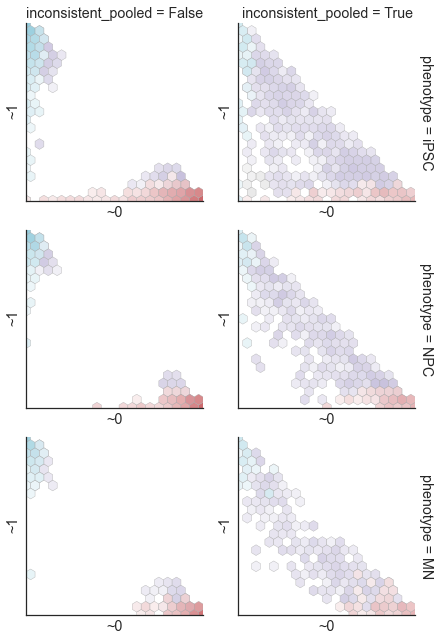

In [135]:
xmax = nmf_positions_modalities.pc_1.max()
ymax = nmf_positions_modalities.pc_2.max()

modality_to_color = MODALITY_TO_COLOR.copy()
modality_to_color['multimodal'] = 'darkgrey'

modality = 'modality'
phenotype = 'phenotype'
vmax = np.log10(nmf_positions_modalities_pooled_inconsistent.groupby([phenotype, modality]).size().max()+1)
hue_order=['bimodal', 'multimodal', 'middle', '~0', '~1']
palette = [modality_to_color[m] for m in hue_order]

g = sns.FacetGrid(nmf_positions_modalities_pooled_inconsistent, 
                  row=phenotype, aspect=1, col='inconsistent_pooled',
                  margin_titles=True, row_order=study.phenotype_order, hue=modality, 
                  palette=palette, hue_order=hue_order)
g.map(hexbin, 'pc_1', 'pc_2', gridsize=20, mincnt=1,
      bins='log', edgecolor='darkgrey',
      extent=(0, xmax, 0, ymax), vmax=vmax, alpha=0.9)

for ax in g.axes.flat:
    if len(ax.collections) == 0:
        ax.axis('off')
    if ax.is_first_col():
        g.set(ylabel=voyage_space_ylabel, yticks=[])
    if ax.is_last_row():
        g.set(xlabel=voyage_space_xlabel, xticks=[])
g.fig.tight_layout()
g.savefig('{}/voyage_space_positions_modalities_hexbin_stacked_inconsistent_pooled.pdf'.format(folder))

/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/nmf_positions_modalities_MN_pooled_inconsistent.pdf
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/nmf_positions_modalities_NPC_pooled_inconsistent.pdf
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/nmf_positions_modalities_iPSC_pooled_inconsistent.pdf


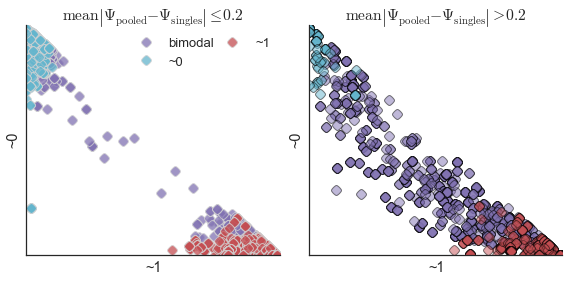

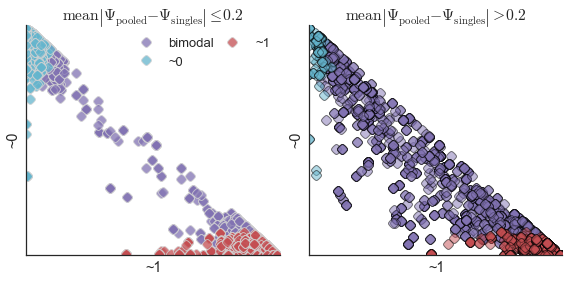

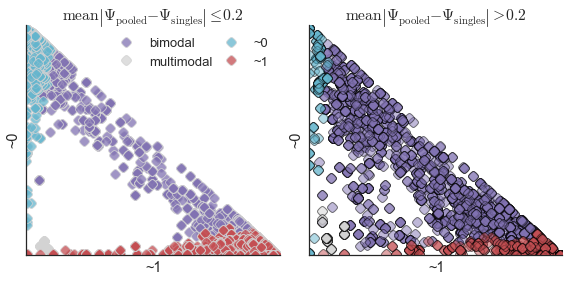

In [136]:



mean_diff_grouped = mean_diff_df.groupby('phenotype')

for phenotype, phenotype_df in nmf_positions_modalities.groupby('phenotype'):
    fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
    ax_consistent = axes[0]
    ax_inconsistent = axes[1]
    mean_diff = mean_diff_grouped.get_group(phenotype)
    
    xmax = 0
    ymax = 0
    

    
    for modality, modality_df in phenotype_df.groupby('modality'):
        modality_df = modality_df.set_index('event_name')
        x = modality_df.pc_1
        y = modality_df.pc_2
        xmax = max(x.max(), xmax)
        ymax = max(y.max(), ymax)
        color = MODALITY_TO_COLOR[modality]
        for inconsistent_pooled, df in mean_diff.groupby('inconsistent_pooled'):
            events = df.event_name.unique()
            x_subset = x[events]
            y_subset = y[events]
            if inconsistent_pooled:
                markeredgecolor = 'k'
                label = None
                ax_inconsistent.plot(x_subset, y_subset, 'o', color=color, alpha=0.5, label=label, 
                                     markeredgecolor=markeredgecolor, markeredgewidth=1, rasterized=True)
#                 ax.plot(x_subset, y_subset, 'o', color='#262626', alpha=0.5, label=None)
            else:
                markeredgecolor = 'lightgrey'
                label = modality
                ax_consistent.plot(x_subset, y_subset, 'o', color=color, alpha=0.75, label=label,
                                  markeredgecolor=markeredgecolor, markeredgewidth=1, rasterized=True)
            
#             print x_subset
            
    ax_consistent.set(title=r'$\mathrm{mean}\left| \Psi_{\mathrm{pooled}} - \Psi_{\mathrm{singles}}\right| \leq ' +
                      '{:.1f}$'.format(min_difference))
    ax_inconsistent.set(title=r'$\mathrm{mean}\left| \Psi_{\mathrm{pooled}} - \Psi_{\mathrm{singles}}\right| > ' +
                      '{:.1f}$'.format(min_difference))  
    for ax in axes:
        ax.legend(ncol=2, columnspacing=.5)
        sns.despine()
        ax.set(xlabel='~1', ylabel='~0', xticks=[], yticks=[], ylim=(0, 1.01*ymax), xlim=(0, 1.01*xmax))
    fig.tight_layout()

    pdf = '{}/nmf_positions_modalities_{}_pooled_inconsistent.pdf'.format(folder, phenotype)
    print pdf
    fig.savefig(pdf)

In [140]:
sample_ids = not_outliers + study.pooled
sample_ids

Index([u'CVN_01', u'CVN_02', u'CVN_03', u'CVN_04', u'CVN_05', u'CVN_06',
       u'CVN_07', u'CVN_08', u'CVN_09', u'CVN_11', 
       ...
       u'P8_01', u'P8_02', u'P8_05', u'P8_06', u'P8_10', u'P8_11', u'P9_01',
       u'P9_02', u'P9_03', u'P9_04'],
      dtype='object', length=189)

## Show voyage space distances and annotate PKM

/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/nmf_space_transitions_pkm_annotated_NPC-MN.pdf
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/nmf_space_transitions_pkm_annotated_iPSC-MN.pdf
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/nmf_space_transitions_pkm_annotated_iPSC-NPC.pdf


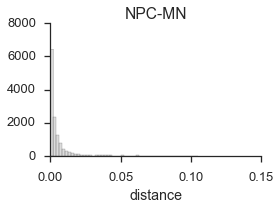

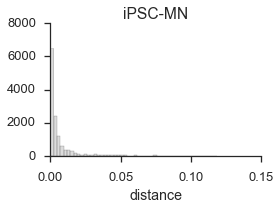

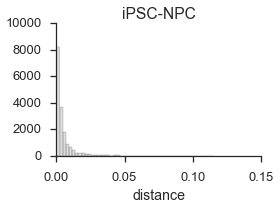

In [143]:
sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

for transition, df in nmf_distances_tidy.groupby('transition'):
#     transition = map(lambda x: x.strip("'u "), transition.strip(')(').split(','))
    df = df.dropna()
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.distplot(df.distance, ax=ax, kde=False, color='darkgrey', bins=50)
    
#     x = df.distance[df.event_name == pkm_event]
#     ymin, ymax = ax.get_ylim()
#     yrange = ymax - ymin
#     ax.annotate('PKM MXE event', xy=(x, ymin+yrange*.01), xytext=(x, ymin+yrange*.5), xycoords='data', 
#                 textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', linewidth=2),
#                ha='center', fontsize=12)
    ax.locator_params('y', nbins=5)
    ax.locator_params('x', nbins=4)
    ax.set(title=transition)
    sns.despine()
    pdf = '{}/nmf_space_transitions_pkm_annotated_{}.pdf'.format(folder, transition)
    print pdf
    fig.tight_layout()
    fig.savefig(pdf)

### total distance

/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/nmf_space_transitions_pkm_annotated_summed.pdf


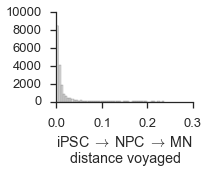

In [144]:
nmf_space_summed_distances = nmf_space_distances.sum(axis=1)

fig, ax = plt.subplots(figsize=(3, 2.5))
sns.distplot(nmf_space_summed_distances, ax=ax, kde=False, color='darkgrey')

# x = nmf_space_summed_distances[pkm_event]
# ymin, ymax = ax.get_ylim()
# yrange = ymax - ymin
# ax.annotate('PKM MXE event', xy=(x, ymin+yrange*.01), xytext=(x, ymin+yrange*.75), xycoords='data', 
#             textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', linewidth=2),
#            ha='center', fontsize=12)
ax.locator_params('y', nbins=5)
ax.locator_params('x', nbins=4)
ax.set(xlabel=r'iPSC $\rightarrow$ NPC $\rightarrow$ MN' + '\ndistance voyaged')
sns.despine()
pdf = '{}/nmf_space_transitions_pkm_annotated_summed.pdf'.format(folder)
print pdf
fig.tight_layout()
fig.savefig(pdf)

### Plot histogram of distances with cutoff

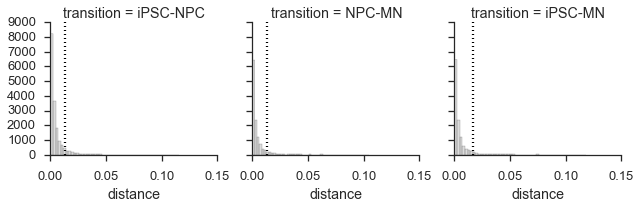

In [145]:
def mean_std_cutoff(x, **kwargs):
    ax = plt.gca()
    cutoff_func = kwargs.pop('cutoff_func')
    cutoff = cutoff_func(x)
    ymin, ymax = ax.get_ylim()
    ax.vlines(cutoff, ymin, ymax, linestyle='dotted')
    
def annotate_event(*args, **kwargs):
    event_description = kwargs.pop('event_description')
    event_name = kwargs.pop('event_name')
    data = kwargs.pop('data')
    event_position = data.distance[data.event_name == event_name]
    ax = plt.gca()
    ymin, ymax = ax.get_ylim()
    yrange = ymax - ymin
    ax.annotate(event_description, xy=(event_position, ymin+yrange*.01), 
                xytext=(event_position, ymin+yrange*.5), xycoords='data', 
                textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', linewidth=2),
               ha='center', fontsize=12)
    
def cutoff_function(x):
    return x.mean() + x.std()

g = sns.FacetGrid(nmf_distances_tidy, col='transition')
g.map(sns.distplot, 'distance', kde=False, color='darkgrey')
g.map(mean_std_cutoff, 'distance', cutoff_func=cutoff_function)
# g.map_dataframe(annotate_event, event_description='PKM MXE\nevent', event_name=pkm_event)
for ax in g.axes.flat:
    ax.locator_params('x', nbins=4)
g.savefig('{}/voyage_distances_hist_cutoff.pdf'.format(folder))

### Get direction of change

In [146]:
phenotype_transitions

[(u'iPSC', u'NPC'), (u'NPC', u'MN'), ('iPSC', 'MN')]

In [148]:
voyage_data = nmf_distances_tidy.merge(voyage_directions, left_on=['event_name', 'transition'],
                              right_on=['event_name', 'transition'])
voyage_data.head()

,transition,event_name,distance,direction
0,iPSC-NPC,exon:chr10:101165513-101165617:-@exon:chr10:10...,0.002635,$\searrow$
1,iPSC-NPC,exon:chr10:101480744-101480825:-@exon:chr10:10...,0.016448,$\nwarrow$
2,iPSC-NPC,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.002994,$\nwarrow$
3,iPSC-NPC,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,NaN
4,iPSC-NPC,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,NaN


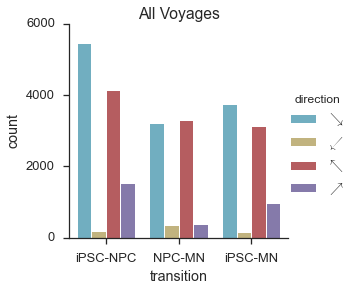

In [149]:
from modish.visualize import MODALITY_PALETTE, MODALITY_ORDER, MODALITY_TO_COLOR
modality_order = MODALITY_ORDER

modality_to_arrows = {voyage_space_ylabel: r'$\nwarrow$', voyage_space_xlabel: r'$\searrow$', 
                      'middle': r'$\swarrow$', 'bimodal': r'$\nearrow$',
                     'multimodal': '.'}
arrow_order = [modality_to_arrows[x] for x in modality_order]
arrow_colors = dict(zip(arrow_order, MODALITY_PALETTE))

g = sns.factorplot(x='transition', hue='direction', data=voyage_data, kind='count', hue_order=arrow_order[:-1],
              palette=arrow_colors, linewidth=1, edgecolor='white')
for ax in g.axes.flat:
    ax.locator_params('y', nbins=5)
    ax.set_title('All Voyages')
g.savefig('{}/voyage_directions_count_barplot.pdf'.format(folder))